# **Stock_Price_Prediction_Model**



### Problem Statement :



1.   Prediction and analysis of the stock market are some of the most complicated tasks to do. There are several reasons for this , such as the market volatility and so many other dependent and independent factors for deciding the vaue of a particular stock in the market.
2.   These factors make it very difficult for any stock market analyst to predict the rise and fall with high accuracy degrees.
3.   Machine Learning model used for analysing and predicting stock values.






### Importing Required Libraries :

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df1 = pd.read_csv('Quote-Equity-TECHM-EQ-01-07-2020-to-01-07-2021.csv', index_col='Date ', parse_dates=True)
df1 = df1.dropna()
print('shape of Date :',df1.shape)

df2 = pd.read_csv('Quote-Equity-TECHM-EQ-01-07-2021-to-01-07-2022.csv', index_col='Date ', parse_dates=True)
df2 = df2.dropna()
print('shape of Date :',df2.shape)

df3 = pd.read_csv('Quote-Equity-TECHM-EQ-01-07-2022-to-01-07-2023.csv', index_col='Date ', parse_dates=True)
df3 = df3.dropna()
print('shape of Date :',df3.shape)

shape of Date : (252, 13)
shape of Date : (250, 13)
shape of Date : (247, 13)


###### Work on DF1

In [4]:
df1.head(3)

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2021-07-01      EQ  1,096.00  1,099.35  1,081.00     1,095.45  1,085.65  \
2021-06-30      EQ  1,088.20  1,105.00  1,083.30     1,088.15  1,096.70   
2021-06-29      EQ  1,109.00  1,109.40  1,083.00     1,105.10  1,088.95   

              close      vwap     52W H   52W L     VOLUME             VALUE    
Date                                                                            
2021-07-01  1,085.15  1,087.08  1,109.40  536.05  1,459,518  1,586,616,040.75  \
2021-06-30  1,095.45  1,096.06  1,109.40  536.05  1,917,370  2,101,552,386.75   
2021-06-29  1,088.15  1,095.11  1,109.40  536.05  2,956,332  3,237,521,521.85   

           No of trades   
Date                      
2021-07-01        49,293  
2021-06-30        47,775  
2021-06-29        64,875

In [5]:
df1.tail(3)

series    OPEN    HIGH     LOW  PREV. CLOSE     ltp   close    
Date                                                                      
2020-07-03      EQ  565.90  572.25  561.05       560.85  565.35  567.20  \
2020-07-02      EQ  549.90  562.50  542.50       545.90  562.50  560.85   
2020-07-01      EQ  544.00  547.35  536.05       543.40  546.75  545.90   

             vwap   52W H   52W L     VOLUME             VALUE  No of trades   
Date                                                                           
2020-07-03  565.93  845.90   471.4  4,007,492  2,267,963,345.30       112,355  
2020-07-02  554.33  845.90   471.4  5,966,758  3,307,566,871.05       156,600  
2020-07-01  542.17  845.90   471.4  3,662,565  1,985,749,688.80       106,942

In [6]:
df1.sort_index(axis=0)
df1.isna().sum()
df1 = df1.asfreq('D')


df1 = df1.sort_index(axis=0)
df1
df1.isna().sum()

df1 = df1.ffill()

df1

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2020-07-01      EQ    544.00    547.35    536.05       543.40    546.75  \
2020-07-02      EQ    549.90    562.50    542.50       545.90    562.50   
2020-07-03      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-04      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-05      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-06      EQ    574.95    588.00    573.05       567.20    580.70   
2020-07-07      EQ    583.85    592.50    577.10       581.55    586.00   
2020-07-08      EQ    589.95    593.90    576.10       586.85    581.70   
2020-07-09      EQ    583.45    587.70    572.05       583.45    576.45   
2020-07-10      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-11      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-12      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-13      EQ    571.95    601.80    570.50       569.00    600.50   
2020-07-14      EQ    594.95    603.80    592.55       600.05    598.50   
2020-07-15      EQ    604.00    630.00    602.00       598.30    615.00   
2020-07-16      EQ    627.00    638.95    588.10       615.30    598.95   
2020-07-17      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-18      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-19      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-20      EQ    603.85    625.95    598.50       599.70    625.50   
2020-07-21      EQ    630.00    631.80    615.35       622.85    620.00   
2020-07-22      EQ    618.00    626.45    611.55       620.70    616.90   
2020-07-23      EQ    612.95    634.60    607.00       617.95    634.20   
2020-07-24      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-25      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-26      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-27      EQ    657.00    671.75    642.80       652.60    663.50   
2020-07-28      EQ    670.00    702.75    667.00       664.55    688.85   
2020-07-29      EQ    686.95    695.25    671.00       684.35    674.50   
2020-07-30      EQ    680.00    687.35    669.55       676.40    673.00   
2020-07-31      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-01      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-02      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-03      EQ    685.95    686.95    669.55       681.65    674.50   
2020-08-04      EQ    675.00    676.65    650.20       673.60    654.80   
2020-08-05      EQ    655.00    661.50    642.55       652.65    649.45   
2020-08-06      EQ    656.00    666.85    649.15       648.55    660.50   
2020-08-07      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-08      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-09      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-10      EQ    668.00    687.35    662.70       662.45    684.00   
2020-08-11      EQ    690.10    693.95    672.10       681.85    678.95   
2020-08-12      EQ    675.00    694.00    672.65       674.80    693.95   
2020-08-13      EQ    695.90    705.80    684.30       692.05    699.00   
2020-08-14      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-15      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-16      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-17      EQ    704.80    724.40    698.65       695.90    723.45   
2020-08-18      EQ    725.00    728.00    710.20       721.05    714.50   
2020-08-19      EQ    715.00    729.00    709.00       713.05    729.00   
2020-08-20      EQ    720.00    732.00    716.20       726.70    725.10   
2020-08-21      EQ    731.00    736.

###### Work on DF2

In [7]:
df2.head(3)

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2022-07-01      EQ    997.00  1,014.00    989.30     1,000.00  1,011.25  \
2022-06-30      EQ  1,016.00  1,026.00    997.00     1,021.10    998.00   
2022-06-29      EQ  1,008.00  1,027.40  1,002.55     1,020.70  1,018.45   

              close      vwap     52W H   52W L     VOLUME             VALUE    
Date                                                                            
2022-07-01  1,010.70  1,003.68  1,838.00  943.70  1,842,102  1,848,883,369.30  \
2022-06-30  1,000.00  1,007.71  1,838.00  943.70  3,264,301  3,289,465,716.35   
2022-06-29  1,021.10  1,018.69  1,838.00  943.70  3,770,663  3,841,128,719.80   

           No of trades   
Date                      
2022-07-01        62,119  
2022-06-30       113,582  
2022-06-29        73,883

In [8]:
df2.tail(3)

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2021-07-05      EQ  1,093.00  1,094.95  1,071.20     1,089.40  1,072.20  \
2021-07-02      EQ  1,087.00  1,097.50  1,075.00     1,085.15  1,089.50   
2021-07-01      EQ  1,096.00  1,099.35  1,081.00     1,095.45  1,085.65   

              close      vwap     52W H   52W L     VOLUME             VALUE    
Date                                                                            
2021-07-05  1,074.65  1,080.45  1,109.40  561.35  2,597,359  2,806,324,841.55  \
2021-07-02  1,089.40  1,085.06  1,109.40  536.05  1,669,409  1,811,416,199.70   
2021-07-01  1,085.15  1,087.08  1,109.40  536.05  1,459,518  1,586,616,040.75   

           No of trades   
Date                      
2021-07-05        47,315  
2021-07-02        59,484  
2021-07-01        49,293

In [9]:
# Drop a same row from previous df
df2 = df2.drop('2021-07-01')

In [10]:
df2.tail()

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2021-07-08      EQ  1,049.00  1,063.40  1,045.00     1,045.90  1,060.40  \
2021-07-07      EQ  1,049.55  1,059.50  1,030.10     1,049.55  1,047.50   
2021-07-06      EQ  1,074.65  1,074.65  1,047.75     1,074.65  1,050.00   
2021-07-05      EQ  1,093.00  1,094.95  1,071.20     1,089.40  1,072.20   
2021-07-02      EQ  1,087.00  1,097.50  1,075.00     1,085.15  1,089.50   

              close      vwap     52W H   52W L     VOLUME             VALUE    
Date                                                                            
2021-07-08  1,060.15  1,055.09  1,109.40  561.35  2,171,947  2,291,605,194.75  \
2021-07-07  1,045.90  1,047.11  1,109.40  561.35  3,713,891  3,888,837,942.95   
2021-07-06  1,049.55  1,057.39  1,109.40  561.35  3,865,594  4,087,438,822.90   
2021-07-05  1,074.65  1,080.45  1,109.40  561.35  2,597,359  2,806,324,841.55   
2021-07-02  1,089.40  1,085.06  1,109.40  536.05  1,669,409  1,811,416,199.70   

           No of trades   
Date                      
2021-07-08        55,921  
2021-07-07        91,334  
2021-07-06        82,030  
2021-07-05        47,315  
2021-07-02        59,484

In [11]:
df2.sort_index(axis=0)
df2.isna().sum()
df2 = df2.asfreq('D')


df2 = df2.sort_index(axis=0)
df2
df2.isna().sum()

df2 = df2.ffill()

df2

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2021-07-02      EQ  1,087.00  1,097.50  1,075.00     1,085.15  1,089.50  \
2021-07-03      EQ  1,087.00  1,097.50  1,075.00     1,085.15  1,089.50   
2021-07-04      EQ  1,087.00  1,097.50  1,075.00     1,085.15  1,089.50   
2021-07-05      EQ  1,093.00  1,094.95  1,071.20     1,089.40  1,072.20   
2021-07-06      EQ  1,074.65  1,074.65  1,047.75     1,074.65  1,050.00   
2021-07-07      EQ  1,049.55  1,059.50  1,030.10     1,049.55  1,047.50   
2021-07-08      EQ  1,049.00  1,063.40  1,045.00     1,045.90  1,060.40   
2021-07-09      EQ  1,055.20  1,068.80  1,049.00     1,060.15  1,051.00   
2021-07-10      EQ  1,055.20  1,068.80  1,049.00     1,060.15  1,051.00   
2021-07-11      EQ  1,055.20  1,068.80  1,049.00     1,060.15  1,051.00   
2021-07-12      EQ  1,057.00  1,058.70  1,046.10     1,051.75  1,057.00   
2021-07-13      EQ  1,062.00  1,062.00  1,048.00     1,056.60  1,050.40   
2021-07-14      EQ  1,054.00  1,080.00  1,048.00     1,050.15  1,077.00   
2021-07-15      EQ  1,078.00  1,119.70  1,076.40     1,078.50  1,109.25   
2021-07-16      EQ  1,112.40  1,118.30  1,083.05     1,112.45  1,102.90   
2021-07-17      EQ  1,112.40  1,118.30  1,083.05     1,112.45  1,102.90   
2021-07-18      EQ  1,112.40  1,118.30  1,083.05     1,112.45  1,102.90   
2021-07-19      EQ  1,088.00  1,110.45  1,086.10     1,103.15  1,096.00   
2021-07-20      EQ  1,095.95  1,102.20  1,084.90     1,094.20  1,085.00   
2021-07-21      EQ  1,095.95  1,102.20  1,084.90     1,094.20  1,085.00   
2021-07-22      EQ  1,080.00  1,152.50  1,080.00     1,087.20  1,146.00   
2021-07-23      EQ  1,123.95  1,141.50  1,115.10     1,148.60  1,129.00   
2021-07-24      EQ  1,123.95  1,141.50  1,115.10     1,148.60  1,129.00   
2021-07-25      EQ  1,123.95  1,141.50  1,115.10     1,148.60  1,129.00   
2021-07-26      EQ  1,131.00  1,138.55  1,116.55     1,131.00  1,117.85   
2021-07-27      EQ  1,120.20  1,127.70  1,104.05     1,120.20  1,123.25   
2021-07-28      EQ  1,124.00  1,130.70  1,106.50     1,120.85  1,128.10   
2021-07-29      EQ  1,128.70  1,141.35  1,115.10     1,119.55  1,127.90   
2021-07-30      EQ  1,185.00  1,237.30  1,175.00     1,127.80  1,207.70   
2021-07-31      EQ  1,185.00  1,237.30  1,175.00     1,127.80  1,207.70   
2021-08-01      EQ  1,185.00  1,237.30  1,175.00     1,127.80  1,207.70   
2021-08-02      EQ  1,210.00  1,214.00  1,195.55     1,209.55  1,206.00   
2021-08-03      EQ  1,211.00  1,230.00  1,210.00     1,210.70  1,225.95   
2021-08-04      EQ  1,225.20  1,230.40  1,213.70     1,226.25  1,219.00   
2021-08-05      EQ  1,217.05  1,254.00  1,217.00     1,216.50  1,249.90   
2021-08-06      EQ  1,252.00  1,273.00  1,243.05     1,248.20  1,268.00   
2021-08-07      EQ  1,252.00  1,273.00  1,243.05     1,248.20  1,268.00   
2021-08-08      EQ  1,252.00  1,273.00  1,243.05     1,248.20  1,268.00   
2021-08-09      EQ  1,290.40  1,306.80  1,266.00     1,264.60  1,289.00   
2021-08-10      EQ  1,288.00  1,329.70  1,282.40     1,287.45  1,323.00   
2021-08-11      EQ  1,323.05  1,326.75  1,298.35     1,323.05  1,320.95   
2021-08-12      EQ  1,323.00  1,394.80  1,317.75     1,323.60  1,383.00   
2021-08-13      EQ  1,380.10  1,390.00  1,365.90     1,386.55  1,383.35   
2021-08-14      EQ  1,380.10  1,390.00  1,365.90     1,386.55  1,383.35   
2021-08-15      EQ  1,380.10  1,390.00  1,365.90     1,386.55  1,383.35   
2021-08-16      EQ  1,381.95  1,399.95  1,360.25     1,383.15  1,370.00   
2021-08-17      EQ  1,372.00  1,428.80  1,370.50     1,367.85  1,410.95   
2021-08-18      EQ  1,418.00  1,425.00  1,404.25     1,413.70  1,412.00   
2021-08-19      EQ  1,418.00  1,425.00  1,404.25     1,413.70  1,412.00   
2021-08-20      EQ  1,370.65  1,420.00  1,370.65     1,412.50  1,396.00   
2021-08-21      EQ  1,370.65  1,420.00  1,370.65     1,412.50  1,396.00   
2021-08-22      EQ  1,370.65  1,420.

###### Work on DF3

In [12]:
df3.head(3)

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2023-06-30      EQ  1,114.65  1,132.50  1,110.60     1,108.10  1,131.10  \
2023-06-28      EQ  1,120.00  1,126.95  1,104.70     1,119.70  1,108.25   
2023-06-27      EQ  1,109.00  1,121.00  1,106.70     1,111.90  1,120.50   

              close      vwap     52W H   52W L     VOLUME             VALUE    
Date                                                                            
2023-06-30  1,130.85  1,125.69  1,165.00  965.05  2,478,834  2,790,410,617.70  \
2023-06-28  1,108.10  1,114.89  1,165.00  965.05  1,876,800  2,092,426,070.10   
2023-06-27  1,119.70  1,114.91  1,165.00  965.05  1,227,245  1,368,271,265.75   

           No of trades   
Date                      
2023-06-30        79,430  
2023-06-28        60,527  
2023-06-27        34,059

In [13]:
df3.tail(3)

series      OPEN      HIGH     LOW  PREV. CLOSE       ltp    
Date                                                                    
2022-07-05      EQ  1,005.00  1,021.90  999.00       999.95  1,003.90  \
2022-07-04      EQ  1,010.70  1,013.80  995.00     1,010.70  1,000.30   
2022-07-01      EQ    997.00  1,014.00  989.30     1,000.00  1,011.25   

              close      vwap     52W H   52W L     VOLUME             VALUE    
Date                                                                            
2022-07-05  1,003.20  1,010.70  1,838.00   943.7  3,045,188  3,077,775,990.10  \
2022-07-04    999.95  1,000.12  1,838.00   943.7  1,814,322  1,814,541,379.05   
2022-07-01  1,010.70  1,003.68  1,838.00   943.7  1,842,102  1,848,883,369.30   

           No of trades   
Date                      
2022-07-05        73,534  
2022-07-04        50,196  
2022-07-01        62,119

In [14]:
# Drop a same row from previous df
df3 = df3.drop('2022-07-01')

In [15]:
df3.sort_index(axis=0)
df3.isna().sum()
df3 = df3.asfreq('D')


df3 = df3.sort_index(axis=0)
df3
df3.isna().sum()

df3 = df3.ffill()

df3

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2022-07-04      EQ  1,010.70  1,013.80    995.00     1,010.70  1,000.30  \
2022-07-05      EQ  1,005.00  1,021.90    999.00       999.95  1,003.90   
2022-07-06      EQ  1,008.00  1,014.90  1,001.60     1,003.20  1,013.25   
2022-07-07      EQ  1,020.95  1,026.90  1,016.00     1,009.90  1,021.00   
2022-07-08      EQ  1,031.00  1,034.70  1,014.55     1,020.75  1,028.50   
2022-07-09      EQ  1,031.00  1,034.70  1,014.55     1,020.75  1,028.50   
2022-07-10      EQ  1,031.00  1,034.70  1,014.55     1,020.75  1,028.50   
2022-07-11      EQ  1,015.00  1,017.35    988.00     1,026.50  1,007.00   
2022-07-12      EQ  1,000.00  1,016.80    994.50     1,007.55    995.00   
2022-07-13      EQ  1,001.40  1,004.20    987.05       997.35    991.90   
2022-07-14      EQ    998.00    998.60    968.80       990.05    976.90   
2022-07-15      EQ    980.00    988.90    965.05       975.80    975.00   
2022-07-16      EQ    980.00    988.90    965.05       975.80    975.00   
2022-07-17      EQ    980.00    988.90    965.05       975.80    975.00   
2022-07-18      EQ    985.00  1,022.00    984.20       973.80  1,010.00   
2022-07-19      EQ    999.95  1,010.95    991.00     1,008.00  1,009.00   
2022-07-20      EQ  1,021.25  1,051.70  1,017.25     1,007.70  1,044.00   
2022-07-21      EQ  1,025.00  1,035.80  1,011.05     1,045.50  1,033.00   
2022-07-22      EQ  1,040.00  1,043.70  1,013.25     1,032.75  1,026.20   
2022-07-23      EQ  1,040.00  1,043.70  1,013.25     1,032.75  1,026.20   
2022-07-24      EQ  1,040.00  1,043.70  1,013.25     1,032.75  1,026.20   
2022-07-25      EQ  1,028.90  1,028.90  1,008.25     1,028.70  1,014.00   
2022-07-26      EQ  1,015.00  1,037.25    994.15     1,017.25    999.65   
2022-07-27      EQ  1,000.00  1,009.95    992.00       999.35  1,007.25   
2022-07-28      EQ  1,021.20  1,043.45  1,015.40     1,007.65  1,040.70   
2022-07-29      EQ  1,055.00  1,068.00  1,044.10     1,038.00  1,050.00   
2022-07-30      EQ  1,055.00  1,068.00  1,044.10     1,038.00  1,050.00   
2022-07-31      EQ  1,055.00  1,068.00  1,044.10     1,038.00  1,050.00   
2022-08-01      EQ  1,058.95  1,058.95  1,037.80     1,048.65  1,051.00   
2022-08-02      EQ  1,046.00  1,049.50  1,030.00     1,049.60  1,030.40   
2022-08-03      EQ  1,027.45  1,057.00  1,024.70     1,032.60  1,055.55   
2022-08-04      EQ  1,063.00  1,072.70  1,036.20     1,052.65  1,053.60   
2022-08-05      EQ  1,060.00  1,067.95  1,050.45     1,056.05  1,058.00   
2022-08-06      EQ  1,060.00  1,067.95  1,050.45     1,056.05  1,058.00   
2022-08-07      EQ  1,060.00  1,067.95  1,050.45     1,056.05  1,058.00   
2022-08-08      EQ  1,056.00  1,064.85  1,049.05     1,058.20  1,056.95   
2022-08-09      EQ  1,056.00  1,064.85  1,049.05     1,058.20  1,056.95   
2022-08-10      EQ  1,056.00  1,059.15  1,043.05     1,056.60  1,053.50   
2022-08-11      EQ  1,072.00  1,093.90  1,070.20     1,055.20  1,076.40   
2022-08-12      EQ  1,073.30  1,076.40  1,062.00     1,077.25  1,067.00   
2022-08-13      EQ  1,073.30  1,076.40  1,062.00     1,077.25  1,067.00   
2022-08-14      EQ  1,073.30  1,076.40  1,062.00     1,077.25  1,067.00   
2022-08-15      EQ  1,073.30  1,076.40  1,062.00     1,077.25  1,067.00   
2022-08-16      EQ  1,076.00  1,079.95  1,056.55     1,065.90  1,077.00   
2022-08-17      EQ  1,072.50  1,106.90  1,072.20     1,077.70  1,104.95   
2022-08-18      EQ  1,100.00  1,109.20  1,088.10     1,104.50  1,108.00   
2022-08-19      EQ  1,110.00  1,135.00  1,100.00     1,105.15  1,102.80   
2022-08-20      EQ  1,110.00  1,135.00  1,100.00     1,105.15  1,102.80   
2022-08-21      EQ  1,110.00  1,135.00  1,100.00     1,105.15  1,102.80   
2022-08-22      EQ  1,096.00  1,100.00  1,075.25     1,104.15  1,076.30   
2022-08-23      EQ  1,062.00  1,070.10  1,047.00     1,078.70  1,070.00   
2022-08-24      EQ  1,066.00  1,073.

###### combining all dataframes

In [16]:
data = pd.concat([df1, df2, df3], axis=0)

In [17]:
data

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2020-07-01      EQ    544.00    547.35    536.05       543.40    546.75  \
2020-07-02      EQ    549.90    562.50    542.50       545.90    562.50   
2020-07-03      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-04      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-05      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-06      EQ    574.95    588.00    573.05       567.20    580.70   
2020-07-07      EQ    583.85    592.50    577.10       581.55    586.00   
2020-07-08      EQ    589.95    593.90    576.10       586.85    581.70   
2020-07-09      EQ    583.45    587.70    572.05       583.45    576.45   
2020-07-10      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-11      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-12      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-13      EQ    571.95    601.80    570.50       569.00    600.50   
2020-07-14      EQ    594.95    603.80    592.55       600.05    598.50   
2020-07-15      EQ    604.00    630.00    602.00       598.30    615.00   
2020-07-16      EQ    627.00    638.95    588.10       615.30    598.95   
2020-07-17      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-18      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-19      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-20      EQ    603.85    625.95    598.50       599.70    625.50   
2020-07-21      EQ    630.00    631.80    615.35       622.85    620.00   
2020-07-22      EQ    618.00    626.45    611.55       620.70    616.90   
2020-07-23      EQ    612.95    634.60    607.00       617.95    634.20   
2020-07-24      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-25      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-26      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-27      EQ    657.00    671.75    642.80       652.60    663.50   
2020-07-28      EQ    670.00    702.75    667.00       664.55    688.85   
2020-07-29      EQ    686.95    695.25    671.00       684.35    674.50   
2020-07-30      EQ    680.00    687.35    669.55       676.40    673.00   
2020-07-31      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-01      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-02      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-03      EQ    685.95    686.95    669.55       681.65    674.50   
2020-08-04      EQ    675.00    676.65    650.20       673.60    654.80   
2020-08-05      EQ    655.00    661.50    642.55       652.65    649.45   
2020-08-06      EQ    656.00    666.85    649.15       648.55    660.50   
2020-08-07      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-08      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-09      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-10      EQ    668.00    687.35    662.70       662.45    684.00   
2020-08-11      EQ    690.10    693.95    672.10       681.85    678.95   
2020-08-12      EQ    675.00    694.00    672.65       674.80    693.95   
2020-08-13      EQ    695.90    705.80    684.30       692.05    699.00   
2020-08-14      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-15      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-16      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-17      EQ    704.80    724.40    698.65       695.90    723.45   
2020-08-18      EQ    725.00    728.00    710.20       721.05    714.50   
2020-08-19      EQ    715.00    729.00    709.00       713.05    729.00   
2020-08-20      EQ    720.00    732.00    716.20       726.70    725.10   
2020-08-21      EQ    731.00    736.

In [18]:
data.sort_index(axis=0)
data.isna().sum()
data = data.asfreq('D')


data = data.sort_index(axis=0)
data
data.isna().sum()

data = data.ffill()

data

series      OPEN      HIGH       LOW  PREV. CLOSE       ltp    
Date                                                                      
2020-07-01      EQ    544.00    547.35    536.05       543.40    546.75  \
2020-07-02      EQ    549.90    562.50    542.50       545.90    562.50   
2020-07-03      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-04      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-05      EQ    565.90    572.25    561.05       560.85    565.35   
2020-07-06      EQ    574.95    588.00    573.05       567.20    580.70   
2020-07-07      EQ    583.85    592.50    577.10       581.55    586.00   
2020-07-08      EQ    589.95    593.90    576.10       586.85    581.70   
2020-07-09      EQ    583.45    587.70    572.05       583.45    576.45   
2020-07-10      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-11      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-12      EQ    572.00    572.00    561.35       577.30    566.80   
2020-07-13      EQ    571.95    601.80    570.50       569.00    600.50   
2020-07-14      EQ    594.95    603.80    592.55       600.05    598.50   
2020-07-15      EQ    604.00    630.00    602.00       598.30    615.00   
2020-07-16      EQ    627.00    638.95    588.10       615.30    598.95   
2020-07-17      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-18      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-19      EQ    604.35    604.35    590.20       599.40    600.00   
2020-07-20      EQ    603.85    625.95    598.50       599.70    625.50   
2020-07-21      EQ    630.00    631.80    615.35       622.85    620.00   
2020-07-22      EQ    618.00    626.45    611.55       620.70    616.90   
2020-07-23      EQ    612.95    634.60    607.00       617.95    634.20   
2020-07-24      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-25      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-26      EQ    632.50    655.40    625.25       632.45    654.90   
2020-07-27      EQ    657.00    671.75    642.80       652.60    663.50   
2020-07-28      EQ    670.00    702.75    667.00       664.55    688.85   
2020-07-29      EQ    686.95    695.25    671.00       684.35    674.50   
2020-07-30      EQ    680.00    687.35    669.55       676.40    673.00   
2020-07-31      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-01      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-02      EQ    678.45    685.45    673.50       674.75    681.95   
2020-08-03      EQ    685.95    686.95    669.55       681.65    674.50   
2020-08-04      EQ    675.00    676.65    650.20       673.60    654.80   
2020-08-05      EQ    655.00    661.50    642.55       652.65    649.45   
2020-08-06      EQ    656.00    666.85    649.15       648.55    660.50   
2020-08-07      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-08      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-09      EQ    657.75    668.00    654.40       660.35    664.00   
2020-08-10      EQ    668.00    687.35    662.70       662.45    684.00   
2020-08-11      EQ    690.10    693.95    672.10       681.85    678.95   
2020-08-12      EQ    675.00    694.00    672.65       674.80    693.95   
2020-08-13      EQ    695.90    705.80    684.30       692.05    699.00   
2020-08-14      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-15      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-16      EQ    692.00    711.00    692.00       697.05    693.30   
2020-08-17      EQ    704.80    724.40    698.65       695.90    723.45   
2020-08-18      EQ    725.00    728.00    710.20       721.05    714.50   
2020-08-19      EQ    715.00    729.00    709.00       713.05    729.00   
2020-08-20      EQ    720.00    732.00    716.20       726.70    725.10   
2020-08-21      EQ    731.00    736.

###### Coverting Datatype

In [19]:
# Step 1: Remove any non-numeric characters (e.g., comma) from the all the columns


data['close '] = data['close '].str.replace(',','')
data['OPEN '] = data['OPEN '].str.replace(',','')
data['HIGH '] = data['HIGH '].str.replace(',','')
data['LOW '] = data['LOW '].str.replace(',','')
data['VOLUME '] = data['VOLUME '].str.replace(',','')

# Step 2: Convert the all columns to float datatype using astype()

data['close '] = data['close '].astype(float)
data['OPEN '] = data['OPEN '].astype(float)
data['HIGH '] = data['HIGH '].astype(float)
data['LOW '] = data['LOW '].astype(float)
data['VOLUME '] = data['VOLUME '].astype(float)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2020-07-01 to 2023-06-30
Freq: D
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series         1095 non-null   object 
 1   OPEN           1095 non-null   float64
 2   HIGH           1095 non-null   float64
 3   LOW            1095 non-null   float64
 4   PREV. CLOSE    1095 non-null   object 
 5   ltp            1095 non-null   object 
 6   close          1095 non-null   float64
 7   vwap           1095 non-null   object 
 8   52W H          1095 non-null   object 
 9   52W L          1095 non-null   object 
 10  VOLUME         1095 non-null   float64
 11  VALUE          1095 non-null   object 
 12  No of trades   1095 non-null   object 
dtypes: float64(5), object(8)
memory usage: 119.8+ KB


In [21]:
data.head()

series   OPEN    HIGH     LOW  PREV. CLOSE     ltp   close    
Date                                                                     
2020-07-01      EQ  544.0  547.35  536.05       543.40  546.75  545.90  \
2020-07-02      EQ  549.9  562.50  542.50       545.90  562.50  560.85   
2020-07-03      EQ  565.9  572.25  561.05       560.85  565.35  567.20   
2020-07-04      EQ  565.9  572.25  561.05       560.85  565.35  567.20   
2020-07-05      EQ  565.9  572.25  561.05       560.85  565.35  567.20   

             vwap   52W H  52W L     VOLUME             VALUE  No of trades   
Date                                                                          
2020-07-01  542.17  845.90  471.4  3662565.0  1,985,749,688.80       106,942  
2020-07-02  554.33  845.90  471.4  5966758.0  3,307,566,871.05       156,600  
2020-07-03  565.93  845.90  471.4  4007492.0  2,267,963,345.30       112,355  
2020-07-04  565.93  845.90  471.4  4007492.0  2,267,963,345.30       112,355  
2020-07-05  565.93  845.90  471.4  4007492.0  2,267,963,345.30       112,355

In [22]:
data.shape

(1095, 13)

In [23]:
data.isna().sum()

series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

### Checking Behaviour of Data

##### 1. Seasonality Checking

<Axes: xlabel='Date '>

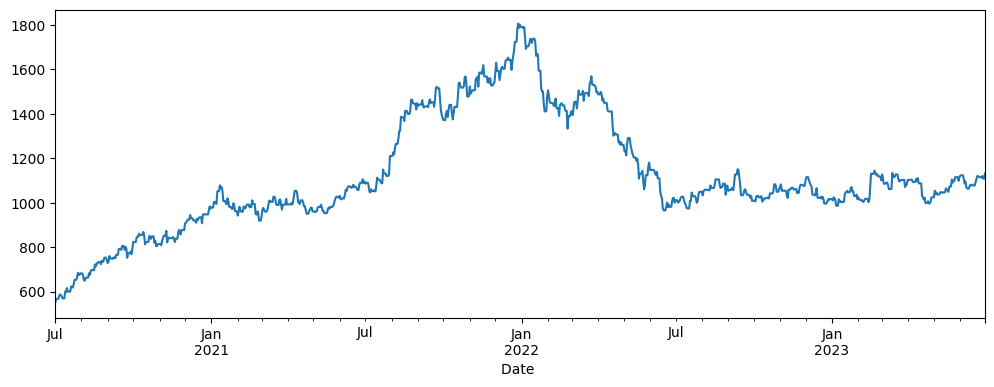

In [24]:
data['close '].plot()

There is no any seasonality

#### 2. Stationarity Checking

Now we need to check "stationarity"

  H0: Null hypothesis >> TS is not stationary, When pvalue > 0.05
  
  Ha: Alternate hypothesis >> Ts is stationary, when pvalue < 0.05

###### 1. By using Adfuller method-1

In [25]:
from statsmodels.tsa.stattools import adfuller

x = data['close '].values
result = adfuller(x)

In [26]:
result

(-2.2479242239786483,
 0.1893135073056112,
 0,
 1094,
 {'1%': -3.436341508283391,
  '5%': -2.864185524365606,
  '10%': -2.5681785627437677},
 9220.042548169185)

In [27]:
# result is in proper way
result
print('P Value :', round(result[1],3))
print('ADF Statistic :',round(result[0],3))
for key, value in result[4].items():
    print('\t         :',key, value)

P Value : 0.189
ADF Statistic : -2.248
	         : 1% -3.436341508283391
	         : 5% -2.864185524365606
	         : 10% -2.5681785627437677


Here as per p value there is no stationarity in data

1. P_value : 0.19 >> Not stationary

2. ADF Statistics : -2.247
                  : 1% -3.436352507699052 # This value requires more than ADF Statistics value
 	                : 5% -2.86419037625175
	                : 10% -2.86419037625175

This method we requires write code again again if we want to check the in future, if we use function for this code then will be no need of write code again and again just we need to call that function whenver we need now we will copy that function from TSA Codes text file

###### 2. By using Adfuller method-2

In [28]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)

    print(dfoutput)

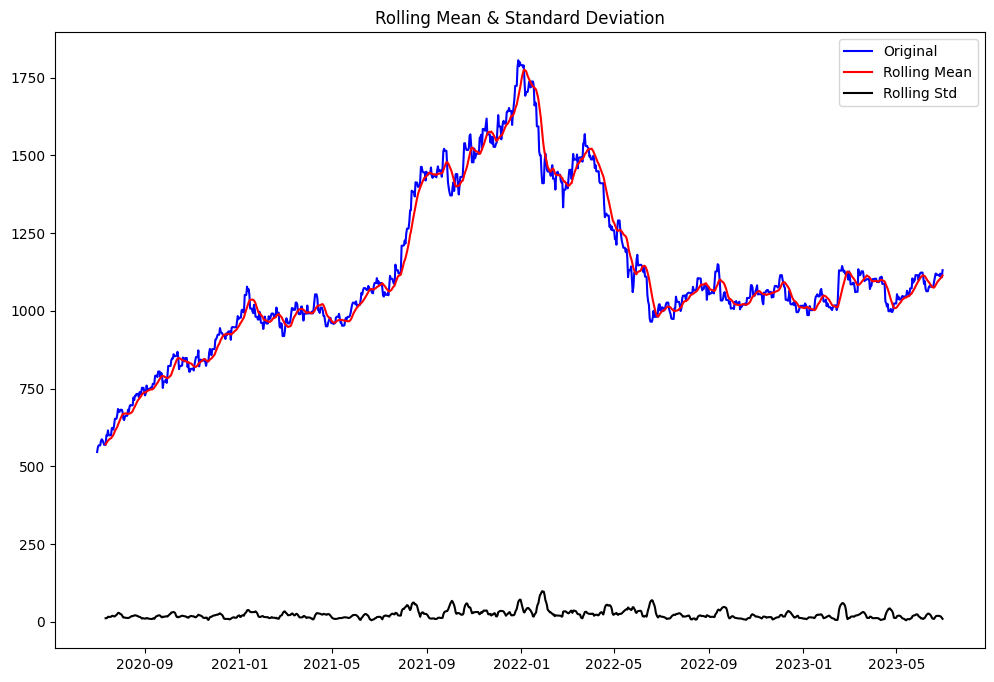

Results of Dickey-Fuller Test:
p-value = 0.1893. The series is likely non-stationary.
Test Statistic                   -2.247924
p-value                           0.189314
#Lags Used                        0.000000
Number of Observations Used    1094.000000
Critical Value (1%)              -3.436342
Critical Value (5%)              -2.864186
Critical Value (10%)             -2.568179
dtype: float64


In [29]:
# now we will call the function "test_stationarity"
test_stationarity(data['close '])

Data is not non-stationary so we will transform the data and trying for stationarity data

#### 3. Make Data Stationarity



1.   Transformation (for make data stationarity)
2.   Rooling mean
3.   DifferencingList item




##### 3.1 Trasformation

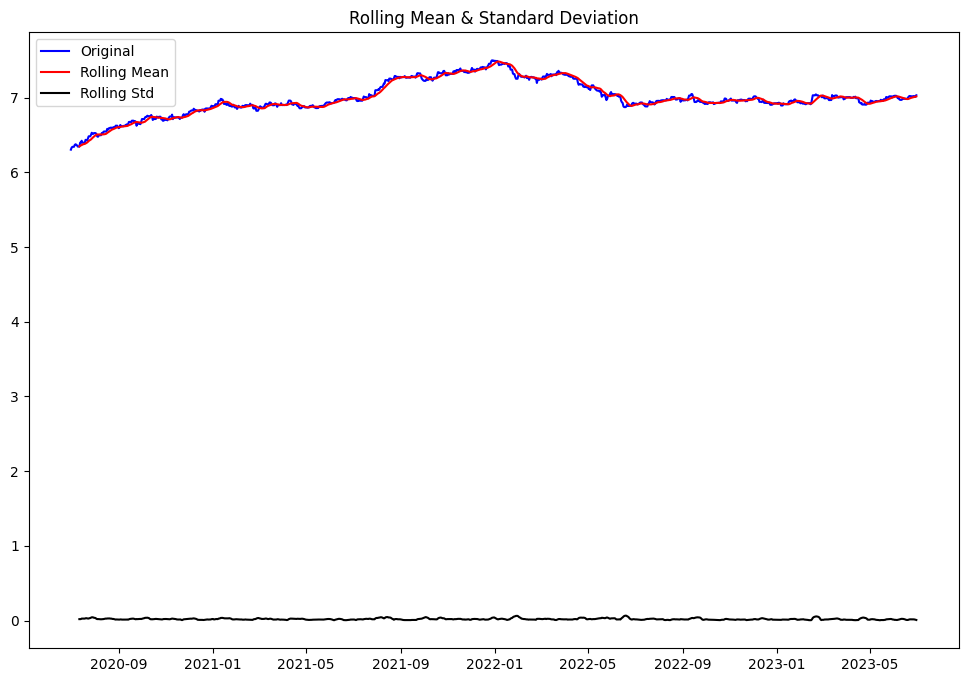

Results of Dickey-Fuller Test:
p-value = 0.0211. The series is likely stationary.
Test Statistic                   -3.181808
p-value                           0.021062
#Lags Used                        0.000000
Number of Observations Used    1094.000000
Critical Value (1%)              -3.436342
Critical Value (5%)              -2.864186
Critical Value (10%)             -2.568179
dtype: float64


In [30]:
test_stationarity(np.log(data['close ']))



> if stationaritiy achieved by using transfromation, then only we can use the transformation otherwise no need to do trasnformation.
> here in our case staionarity is achieved by using log trasformation



##### 3.2 Rolling Mean

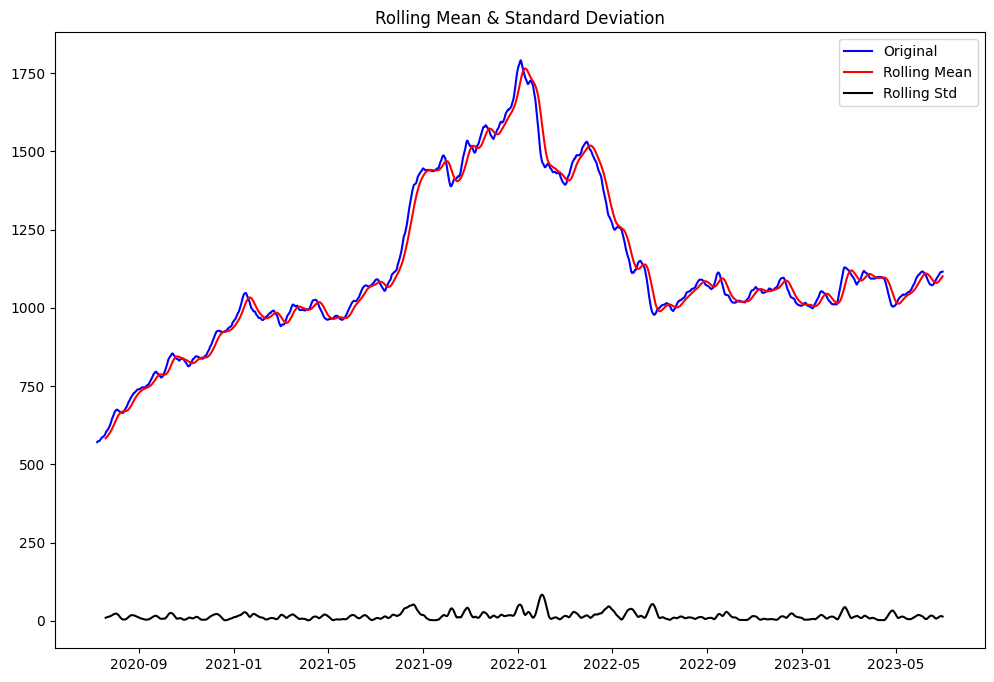

Results of Dickey-Fuller Test:
p-value = 0.2868. The series is likely non-stationary.
Test Statistic                   -1.999588
p-value                           0.286754
#Lags Used                       19.000000
Number of Observations Used    1067.000000
Critical Value (1%)              -3.436493
Critical Value (5%)              -2.864253
Critical Value (10%)             -2.568214
dtype: float64


In [31]:
data['roll_mean'] = data['close '].rolling(window=9).mean()
test_stationarity(data['roll_mean'].dropna())

##### 3.3 Differencing


First of all check the best differencing number by using "ndiffs"

1. step 1 - !pip install pmdarima
2. step 2 - import ndiffs (from pmdarima.arima.utils import ndiffs)
3. step 3 - pass 'adf'(adfuller) ndiffs(df.Monthly_beer_production, test='adf')




In [32]:
# !pip install pmdarima

In [33]:
from pmdarima.arima.utils import ndiffs
ndiffs(data['close '], test='adf')

1

Here this will give this number for differencing

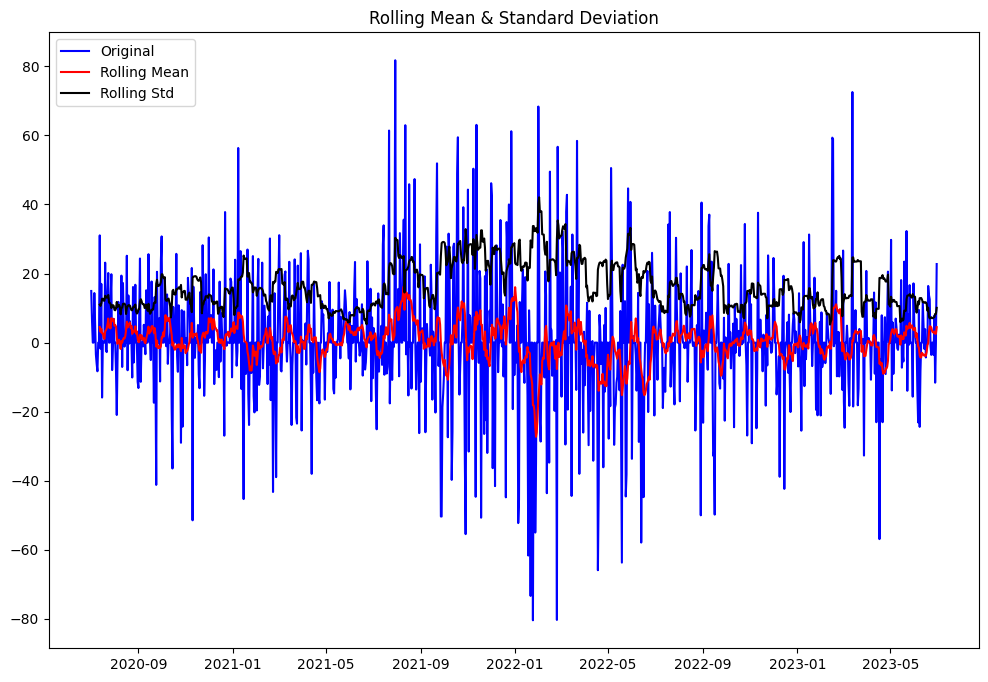

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                  -24.152764
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1092.000000
Critical Value (1%)              -3.436353
Critical Value (5%)              -2.864190
Critical Value (10%)             -2.568181
dtype: float64


In [34]:
data['close_stock_diff'] = data['close '] - data['close '].shift(1)
test_stationarity(data['close_stock_diff'].dropna())

> here we achieved stationarity
1. Note: In this case stationarity achieved by using differencing

In [35]:
data

series     OPEN     HIGH      LOW  PREV. CLOSE       ltp    close    
Date                                                                            
2020-07-01      EQ   544.00   547.35   536.05       543.40    546.75   545.90  \
2020-07-02      EQ   549.90   562.50   542.50       545.90    562.50   560.85   
2020-07-03      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-04      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-05      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-06      EQ   574.95   588.00   573.05       567.20    580.70   581.55   
2020-07-07      EQ   583.85   592.50   577.10       581.55    586.00   586.85   
2020-07-08      EQ   589.95   593.90   576.10       586.85    581.70   583.45   
2020-07-09      EQ   583.45   587.70   572.05       583.45    576.45   577.30   
2020-07-10      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-11      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-12      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-13      EQ   571.95   601.80   570.50       569.00    600.50   600.05   
2020-07-14      EQ   594.95   603.80   592.55       600.05    598.50   598.30   
2020-07-15      EQ   604.00   630.00   602.00       598.30    615.00   615.30   
2020-07-16      EQ   627.00   638.95   588.10       615.30    598.95   599.40   
2020-07-17      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-18      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-19      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-20      EQ   603.85   625.95   598.50       599.70    625.50   622.85   
2020-07-21      EQ   630.00   631.80   615.35       622.85    620.00   620.70   
2020-07-22      EQ   618.00   626.45   611.55       620.70    616.90   617.95   
2020-07-23      EQ   612.95   634.60   607.00       617.95    634.20   632.45   
2020-07-24      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-25      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-26      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-27      EQ   657.00   671.75   642.80       652.60    663.50   664.55   
2020-07-28      EQ   670.00   702.75   667.00       664.55    688.85   684.35   
2020-07-29      EQ   686.95   695.25   671.00       684.35    674.50   676.40   
2020-07-30      EQ   680.00   687.35   669.55       676.40    673.00   674.75   
2020-07-31      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-01      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-02      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-03      EQ   685.95   686.95   669.55       681.65    674.50   673.60   
2020-08-04      EQ   675.00   676.65   650.20       673.60    654.80   652.65   
2020-08-05      EQ   655.00   661.50   642.55       652.65    649.45   648.55   
2020-08-06      EQ   656.00   666.85   649.15       648.55    660.50   660.35   
2020-08-07      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-08      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-09      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-10      EQ   668.00   687.35   662.70       662.45    684.00   681.85   
2020-08-11      EQ   690.10   693.95   672.10       681.85    678.95   674.80   
2020-08-12      EQ   675.00   694.00   672.65       674.80    693.95   692.05   
2020-08-13      EQ   695.90   705.80   684.30       692.05    699.00   697.05   
2020-08-14      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-15      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-16      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-17      EQ   704.80   724.40   698

### Creation of without nan value dataframe

In [36]:
new_df = data.copy()
new_df.dropna(inplace=True)
new_df

series     OPEN     HIGH      LOW  PREV. CLOSE       ltp    close    
Date                                                                            
2020-07-09      EQ   583.45   587.70   572.05       583.45    576.45   577.30  \
2020-07-10      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-11      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-12      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-13      EQ   571.95   601.80   570.50       569.00    600.50   600.05   
2020-07-14      EQ   594.95   603.80   592.55       600.05    598.50   598.30   
2020-07-15      EQ   604.00   630.00   602.00       598.30    615.00   615.30   
2020-07-16      EQ   627.00   638.95   588.10       615.30    598.95   599.40   
2020-07-17      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-18      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-19      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-20      EQ   603.85   625.95   598.50       599.70    625.50   622.85   
2020-07-21      EQ   630.00   631.80   615.35       622.85    620.00   620.70   
2020-07-22      EQ   618.00   626.45   611.55       620.70    616.90   617.95   
2020-07-23      EQ   612.95   634.60   607.00       617.95    634.20   632.45   
2020-07-24      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-25      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-26      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-27      EQ   657.00   671.75   642.80       652.60    663.50   664.55   
2020-07-28      EQ   670.00   702.75   667.00       664.55    688.85   684.35   
2020-07-29      EQ   686.95   695.25   671.00       684.35    674.50   676.40   
2020-07-30      EQ   680.00   687.35   669.55       676.40    673.00   674.75   
2020-07-31      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-01      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-02      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-03      EQ   685.95   686.95   669.55       681.65    674.50   673.60   
2020-08-04      EQ   675.00   676.65   650.20       673.60    654.80   652.65   
2020-08-05      EQ   655.00   661.50   642.55       652.65    649.45   648.55   
2020-08-06      EQ   656.00   666.85   649.15       648.55    660.50   660.35   
2020-08-07      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-08      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-09      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-10      EQ   668.00   687.35   662.70       662.45    684.00   681.85   
2020-08-11      EQ   690.10   693.95   672.10       681.85    678.95   674.80   
2020-08-12      EQ   675.00   694.00   672.65       674.80    693.95   692.05   
2020-08-13      EQ   695.90   705.80   684.30       692.05    699.00   697.05   
2020-08-14      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-15      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-16      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-17      EQ   704.80   724.40   698.65       695.90    723.45   721.05   
2020-08-18      EQ   725.00   728.00   710.20       721.05    714.50   713.05   
2020-08-19      EQ   715.00   729.00   709.00       713.05    729.00   726.70   
2020-08-20      EQ   720.00   732.00   716.20       726.70    725.10   726.40   
2020-08-21      EQ   731.00   736.65   730.00       726.40    731.45   732.60   
2020-08-22      EQ   731.00   736.65   730.00       726.40    731.45   732.60   
2020-08-23      EQ   731.00   736.65   730.00       726.40    731.45   732.60   
2020-08-24      EQ   734.95   734.95   719.25       732.60    725.40   722.50   
2020-08-25      EQ   727.00   740.35   714

#### Visual Method (Seasonal Decompostion)

Data pattern segrigation in three parts only

1. Trend
2. Seasonality
3. Residual

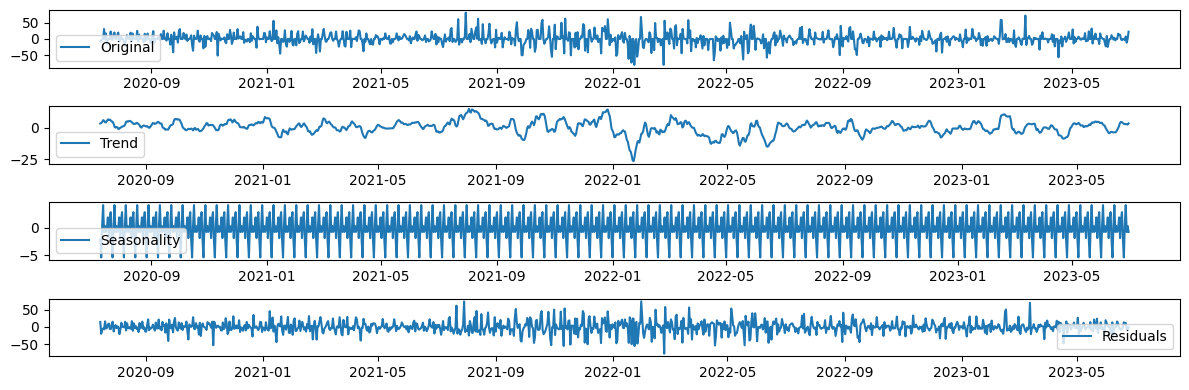

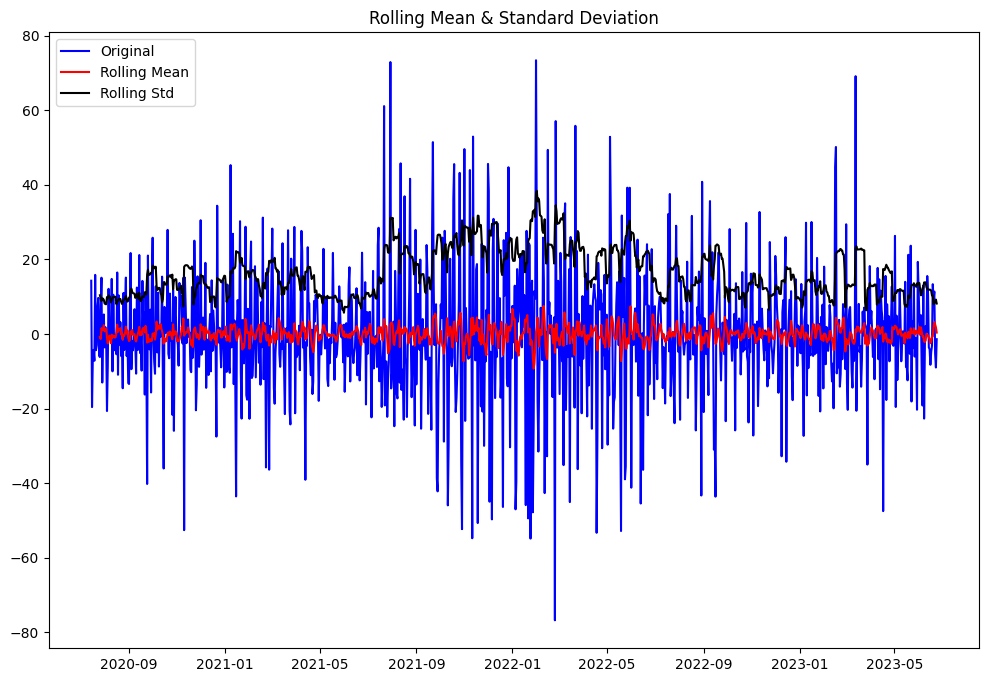

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.485214e+01
p-value                        1.770526e-27
#Lags Used                     2.000000e+01
Number of Observations Used    1.054000e+03
Critical Value (1%)           -3.436569e+00
Critical Value (5%)           -2.864286e+00
Critical Value (10%)          -2.568232e+00
dtype: float64


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new_df['close_stock_diff'],model='additive', period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(new_df['close_stock_diff'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposed_log_data = residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data)

### Find best ARIMA Parameters (p,d,q)

1. autogressive > p
2. Integrated > d
3. Moving Average > q

###### Method - 1

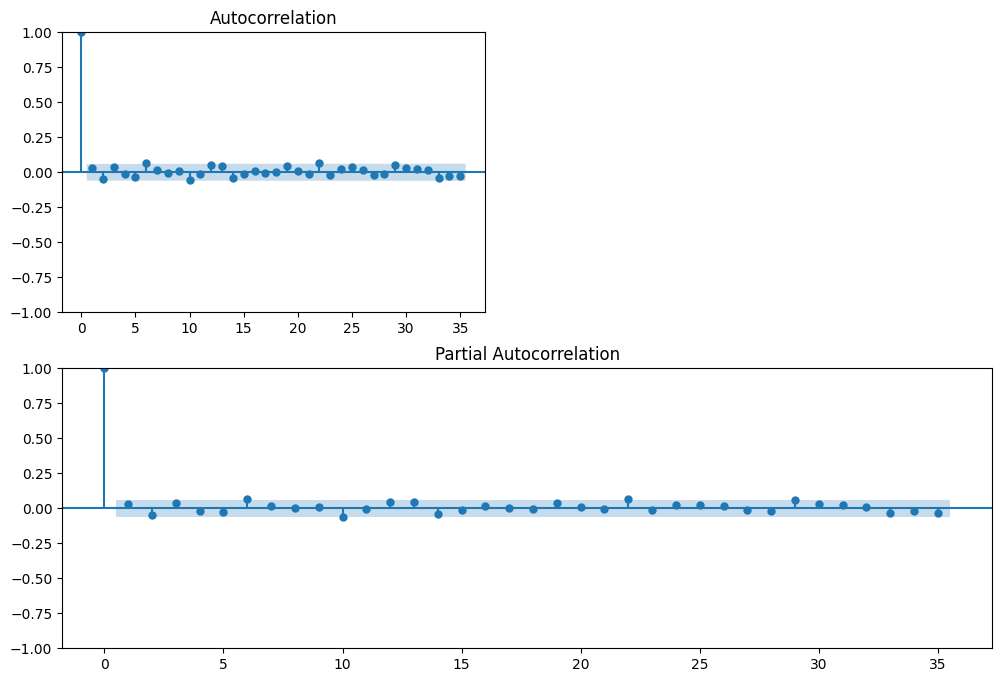

In [38]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(new_df['close_stock_diff'],lags=35,ax=ax1)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_df['close_stock_diff'],lags=35,ax=ax2)

###### Method -2

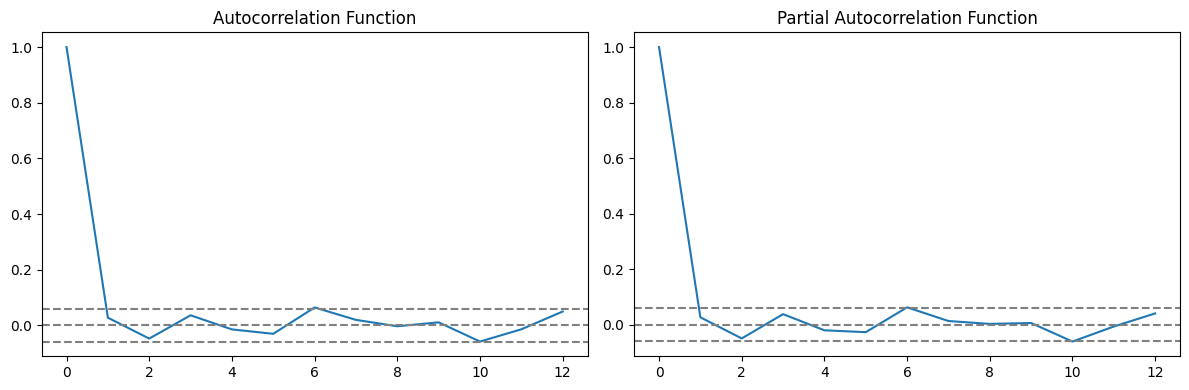

In [39]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(new_df['close_stock_diff'], nlags=12)
lag_pacf = pacf(new_df['close_stock_diff'], nlags=12, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
#plt.axis([xmin,xmax,ymin,ymax])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

###### Method - 3

In [40]:
# # grid search ARIMA parameters for time series
# import warnings
# from math import sqrt
# from pandas import read_csv
# import datetime
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# # evaluate an ARIMA model for a given order (p,d,q)
# def evaluate_arima_model(X, arima_order):
#     # prepare training dataset
#     train_size = int(len(X) * 0.66)
#     train, test = X[0:train_size], X[train_size:]
#     history = [x for x in train]
#     # make predictions
#     predictions = list()
#     for t in range(len(test)):
#         model = ARIMA(history, order=arima_order)
#         model_fit = model.fit()
#         yhat = model_fit.forecast()[0]
#         predictions.append(yhat)
#         history.append(test[t])
#     # calculate out of sample error
#     rmse = sqrt(mean_squared_error(test, predictions))
#     return rmse

# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
#     dataset = dataset.astype('float32')
#     best_score, best_cfg = float("inf"), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p,d,q)
#                 try:
#                     rmse = evaluate_arima_model(dataset, order)
#                     if rmse < best_score:
#                         best_score, best_cfg = rmse, order
#                     print('ARIMA%s RMSE=%.3f' % (order,rmse))
#                 except:
#                     continue
#     print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# # load dataset
# def parser(x):
#     return datetime.strptime('190'+x, '%Y-%m')
# # series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series= new_df['close_stock_diff']
# # evaluate parameters
# p_values = range(2,3)
# d_values = range(0,2)
# q_values = range(2,4)
# warnings.filterwarnings("ignore")
# evaluate_models(series.values, p_values, d_values, q_values)

<!-- ARIMA(2, 0, 2) RMSE=30.229
ARIMA(2, 0, 3) RMSE=30.436
ARIMA(2, 1, 2) RMSE=30.189
ARIMA(2, 1, 3) RMSE=30.127
Best ARIMA(2, 1, 3) RMSE=30.127 -->

### Data Splitting

In TSA Here we always split manual splitting instad of train_test_split

After getting p,d,q values we passing original dataframe

In [41]:
y_train = data['close '] [:int(0.7*(len(data['close '])))]
y_test  = data['close '] [int(0.7*(len(data['close ']))):]

In [42]:
print(y_train.shape, y_test.shape)

(766,) (329,)


### Model Building

## ARIMA Model

In [43]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(2,0,3))
result_arima = model.fit()

###### Data or Index Passing

In [44]:
y_train.shape, y_test.shape

((766,), (329,))

<Axes: xlabel='Date '>

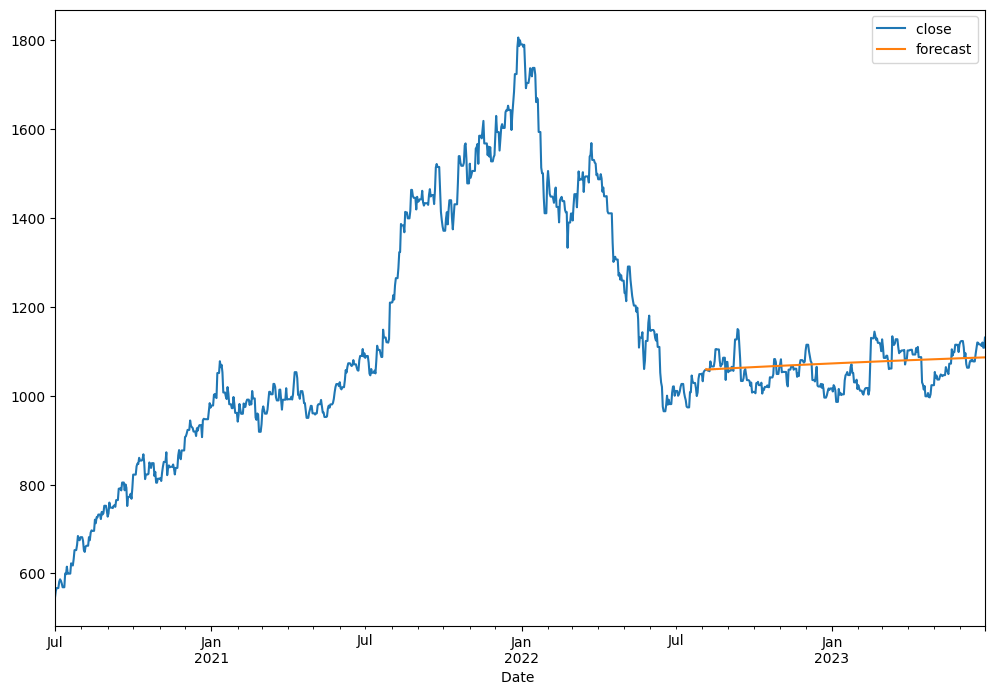

In [45]:
# # index passing
data['forecast']= result_arima.predict(start=766 , end=1095)
data[['close ','forecast']].plot(figsize=(12,8))

###### Model Evaluation

In [46]:
y_pred_ar = data['forecast'][766:]
y_pred_ar

Date 
2022-08-06    1059.621473
2022-08-07    1058.380283
2022-08-08    1059.543059
2022-08-09    1058.685012
2022-08-10    1059.658584
2022-08-11    1058.971538
2022-08-12    1059.789586
2022-08-13    1059.243011
2022-08-14    1059.933212
2022-08-15    1059.502021
2022-08-16    1060.087117
2022-08-17    1059.750695
2022-08-18    1060.249374
2022-08-19    1059.990781
2022-08-20    1060.418403
2022-08-21    1060.223718
2022-08-22    1060.592901
2022-08-23    1060.450686
2022-08-24    1060.771801
2022-08-25    1060.672656
2022-08-26    1060.954226
2022-08-27    1060.890427
2022-08-28    1061.139454
2022-08-29    1061.104655
2022-08-30    1061.326894
2022-08-31    1061.315878
2022-09-01    1061.516059
2022-09-02    1061.524541
2022-09-03    1061.706550
2022-09-04    1061.731008
2022-09-05    1061.898038
2022-09-06    1061.935579
2022-09-07    1062.090255
2022-09-08    1062.138501
2022-09-09    1062.282979
2022-09-10    1062.339977
2022-09-11    1062.476029
2022-09-12    1062.540173
2022-0

In [47]:
y_pred_ar.shape

(329,)

**now we need make future dates for TSA**

In [48]:
data.index[-1] # future dates will be ahed of this date 

Timestamp('2023-06-30 00:00:00')

In [49]:
from pandas.tseries.offsets import DateOffset

future_dates = [data.index[-1]+DateOffset(days=i) for i in range(365)]

future_dates_df = pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_dataframe = pd.concat([data,future_dates_df])
future_dataframe

series     OPEN     HIGH      LOW  PREV. CLOSE       ltp    close    
2020-07-01      EQ   544.00   547.35   536.05       543.40    546.75   545.90  \
2020-07-02      EQ   549.90   562.50   542.50       545.90    562.50   560.85   
2020-07-03      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-04      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-05      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-06      EQ   574.95   588.00   573.05       567.20    580.70   581.55   
2020-07-07      EQ   583.85   592.50   577.10       581.55    586.00   586.85   
2020-07-08      EQ   589.95   593.90   576.10       586.85    581.70   583.45   
2020-07-09      EQ   583.45   587.70   572.05       583.45    576.45   577.30   
2020-07-10      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-11      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-12      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-13      EQ   571.95   601.80   570.50       569.00    600.50   600.05   
2020-07-14      EQ   594.95   603.80   592.55       600.05    598.50   598.30   
2020-07-15      EQ   604.00   630.00   602.00       598.30    615.00   615.30   
2020-07-16      EQ   627.00   638.95   588.10       615.30    598.95   599.40   
2020-07-17      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-18      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-19      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-20      EQ   603.85   625.95   598.50       599.70    625.50   622.85   
2020-07-21      EQ   630.00   631.80   615.35       622.85    620.00   620.70   
2020-07-22      EQ   618.00   626.45   611.55       620.70    616.90   617.95   
2020-07-23      EQ   612.95   634.60   607.00       617.95    634.20   632.45   
2020-07-24      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-25      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-26      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-27      EQ   657.00   671.75   642.80       652.60    663.50   664.55   
2020-07-28      EQ   670.00   702.75   667.00       664.55    688.85   684.35   
2020-07-29      EQ   686.95   695.25   671.00       684.35    674.50   676.40   
2020-07-30      EQ   680.00   687.35   669.55       676.40    673.00   674.75   
2020-07-31      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-01      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-02      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-03      EQ   685.95   686.95   669.55       681.65    674.50   673.60   
2020-08-04      EQ   675.00   676.65   650.20       673.60    654.80   652.65   
2020-08-05      EQ   655.00   661.50   642.55       652.65    649.45   648.55   
2020-08-06      EQ   656.00   666.85   649.15       648.55    660.50   660.35   
2020-08-07      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-08      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-09      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-10      EQ   668.00   687.35   662.70       662.45    684.00   681.85   
2020-08-11      EQ   690.10   693.95   672.10       681.85    678.95   674.80   
2020-08-12      EQ   675.00   694.00   672.65       674.80    693.95   692.05   
2020-08-13      EQ   695.90   705.80   684.30       692.05    699.00   697.05   
2020-08-14      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-15      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-16      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-17      EQ   704.80   724.40   698.65       695.90    723.45   721.05   
2020-08-18      EQ   725.00   728.00   710

In [50]:
# model will predict from last date of "y_test" to next 365 days

<Axes: >

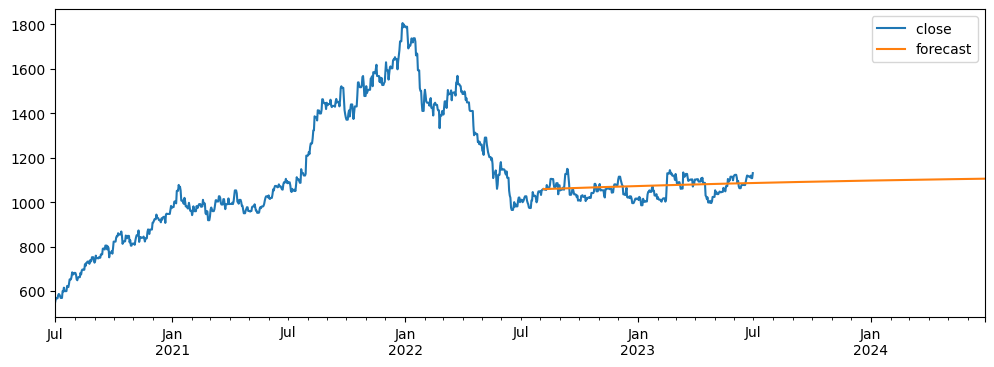

In [51]:
future_dataframe['forecast'] = result_arima.predict(start = 766, end = 1460 )
future_dataframe[['close ','forecast']].plot()

In [52]:
future_dataframe[1095:].shape

(364, 16)

In [53]:
def mean_abs_perc_error(y_test,y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs(y_test-y_pred)/y_test)*100   

In [54]:
mean_abs_perc_error(y_test,y_pred_ar)

3.1440199123817

###### ARIMA model is predicting 96.86 % accurate (100% - 3.14%) 

### SARIMA Model

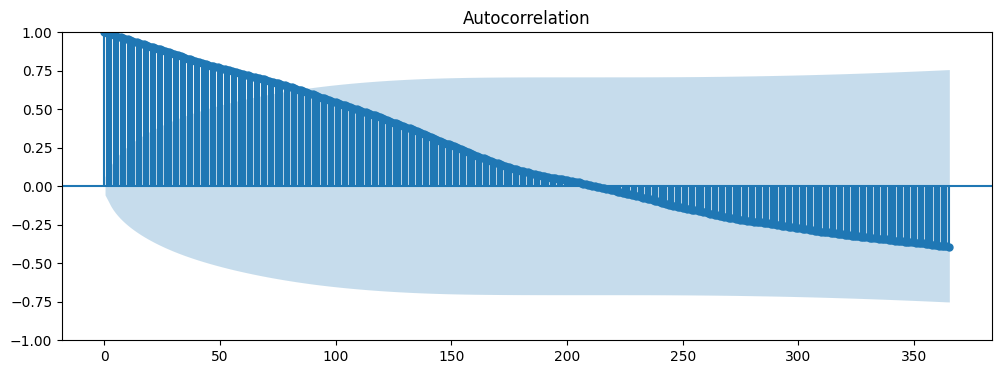

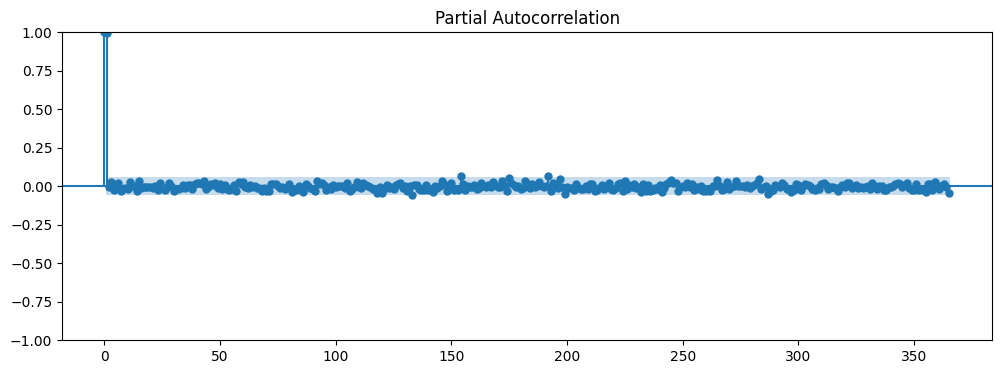

In [55]:
# Plot ACF and PACF for different lags to identify the seasonality
# For example, to identify a yearly (one-year) seasonality:
plot_acf(data['close '], lags=365)  # Assuming 365 days in a year
plot_pacf(data['close '], lags=365)
plt.show()


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(y_train, order=(2,0,3), seasonal_order=(0,0,0,365))
result_sar=sarima.fit()
# seasonality occured for 365 days so seasonal_order=(365)

###### Data or Index Passing

<Axes: xlabel='Date '>

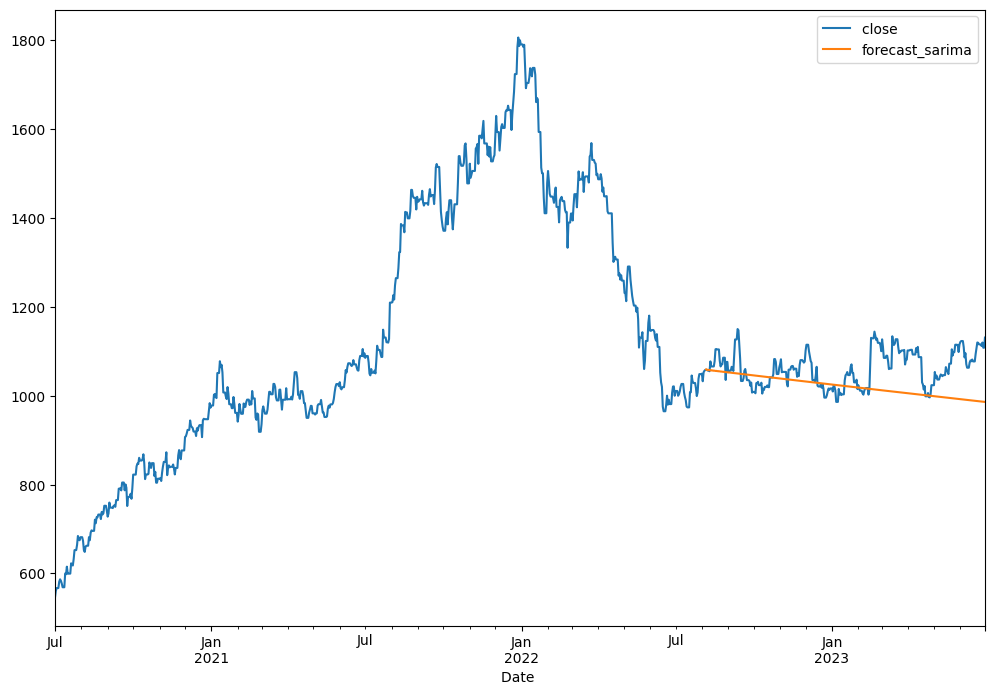

In [57]:
# index passing
data['forecast_sarima']=result_sar.predict(start=766,end=1095)
data[['close ','forecast_sarima']].plot(figsize=(12,8))

In [58]:
y_pred_sar = data['forecast_sarima'][766:1095]
y_pred_sar.head(12)

Date 
2022-08-06    1059.273541
2022-08-07    1057.684488
2022-08-08    1058.514230
2022-08-09    1057.325896
2022-08-10    1057.967853
2022-08-11    1056.950009
2022-08-12    1057.437536
2022-08-13    1056.559934
2022-08-14    1056.920464
2022-08-15    1056.158224
2022-08-16    1056.414320
2022-08-17    1055.746979
Freq: D, Name: forecast_sarima, dtype: float64

###### # now we need make future dates for TSA

In [59]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(days=x)for x in range(365)]

future_dates=pd.DataFrame(index=future_dates[1:],columns=data.columns)
future_df=pd.concat([data,future_dates])
future_df

series     OPEN     HIGH      LOW  PREV. CLOSE       ltp    close    
2020-07-01      EQ   544.00   547.35   536.05       543.40    546.75   545.90  \
2020-07-02      EQ   549.90   562.50   542.50       545.90    562.50   560.85   
2020-07-03      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-04      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-05      EQ   565.90   572.25   561.05       560.85    565.35   567.20   
2020-07-06      EQ   574.95   588.00   573.05       567.20    580.70   581.55   
2020-07-07      EQ   583.85   592.50   577.10       581.55    586.00   586.85   
2020-07-08      EQ   589.95   593.90   576.10       586.85    581.70   583.45   
2020-07-09      EQ   583.45   587.70   572.05       583.45    576.45   577.30   
2020-07-10      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-11      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-12      EQ   572.00   572.00   561.35       577.30    566.80   569.00   
2020-07-13      EQ   571.95   601.80   570.50       569.00    600.50   600.05   
2020-07-14      EQ   594.95   603.80   592.55       600.05    598.50   598.30   
2020-07-15      EQ   604.00   630.00   602.00       598.30    615.00   615.30   
2020-07-16      EQ   627.00   638.95   588.10       615.30    598.95   599.40   
2020-07-17      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-18      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-19      EQ   604.35   604.35   590.20       599.40    600.00   599.70   
2020-07-20      EQ   603.85   625.95   598.50       599.70    625.50   622.85   
2020-07-21      EQ   630.00   631.80   615.35       622.85    620.00   620.70   
2020-07-22      EQ   618.00   626.45   611.55       620.70    616.90   617.95   
2020-07-23      EQ   612.95   634.60   607.00       617.95    634.20   632.45   
2020-07-24      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-25      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-26      EQ   632.50   655.40   625.25       632.45    654.90   652.60   
2020-07-27      EQ   657.00   671.75   642.80       652.60    663.50   664.55   
2020-07-28      EQ   670.00   702.75   667.00       664.55    688.85   684.35   
2020-07-29      EQ   686.95   695.25   671.00       684.35    674.50   676.40   
2020-07-30      EQ   680.00   687.35   669.55       676.40    673.00   674.75   
2020-07-31      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-01      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-02      EQ   678.45   685.45   673.50       674.75    681.95   681.65   
2020-08-03      EQ   685.95   686.95   669.55       681.65    674.50   673.60   
2020-08-04      EQ   675.00   676.65   650.20       673.60    654.80   652.65   
2020-08-05      EQ   655.00   661.50   642.55       652.65    649.45   648.55   
2020-08-06      EQ   656.00   666.85   649.15       648.55    660.50   660.35   
2020-08-07      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-08      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-09      EQ   657.75   668.00   654.40       660.35    664.00   662.45   
2020-08-10      EQ   668.00   687.35   662.70       662.45    684.00   681.85   
2020-08-11      EQ   690.10   693.95   672.10       681.85    678.95   674.80   
2020-08-12      EQ   675.00   694.00   672.65       674.80    693.95   692.05   
2020-08-13      EQ   695.90   705.80   684.30       692.05    699.00   697.05   
2020-08-14      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-15      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-16      EQ   692.00   711.00   692.00       697.05    693.30   695.90   
2020-08-17      EQ   704.80   724.40   698.65       695.90    723.45   721.05   
2020-08-18      EQ   725.00   728.00   710

In [60]:
future_df.tail()

series   OPEN   HIGH   LOW  PREV. CLOSE  ltp   close  vwap  52W H    
2024-06-24     NaN    NaN    NaN   NaN          NaN  NaN     NaN   NaN    NaN  \
2024-06-25     NaN    NaN    NaN   NaN          NaN  NaN     NaN   NaN    NaN   
2024-06-26     NaN    NaN    NaN   NaN          NaN  NaN     NaN   NaN    NaN   
2024-06-27     NaN    NaN    NaN   NaN          NaN  NaN     NaN   NaN    NaN   
2024-06-28     NaN    NaN    NaN   NaN          NaN  NaN     NaN   NaN    NaN   

           52W L   VOLUME  VALUE  No of trades   roll_mean  close_stock_diff   
2024-06-24    NaN      NaN    NaN           NaN        NaN               NaN  \
2024-06-25    NaN      NaN    NaN           NaN        NaN               NaN   
2024-06-26    NaN      NaN    NaN           NaN        NaN               NaN   
2024-06-27    NaN      NaN    NaN           NaN        NaN               NaN   
2024-06-28    NaN      NaN    NaN           NaN        NaN               NaN   

            forecast  forecast_sarima  
2024-06-24       NaN              NaN  
2024-06-25       NaN              NaN  
2024-06-26       NaN              NaN  
2024-06-27       NaN              NaN  
2024-06-28       NaN              NaN

<Axes: >

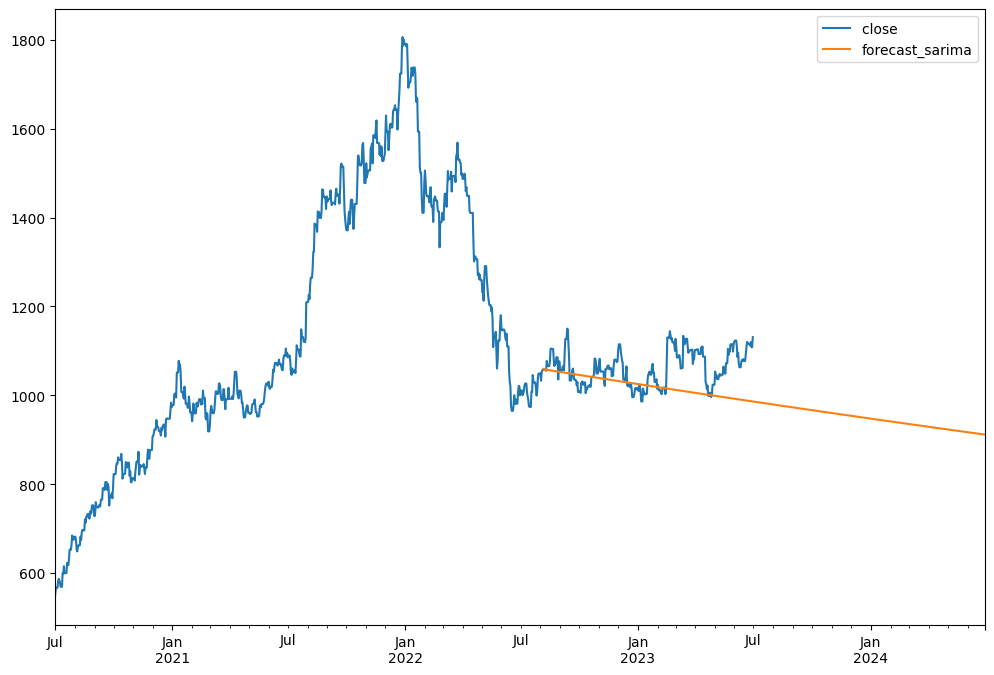

In [61]:
future_df['forecast_sarima']=result_sar.predict(start=766,end=1460)
future_df[['close ','forecast_sarima']].plot(figsize=(12,8))

In [62]:
future_df['forecast_sarima'][1095:]

2023-07-01    985.850487
2023-07-02    985.637538
2023-07-03    985.424636
2023-07-04    985.211779
2023-07-05    984.998969
2023-07-06    984.786204
2023-07-07    984.573486
2023-07-08    984.360813
2023-07-09    984.148187
2023-07-10    983.935606
2023-07-11    983.723071
2023-07-12    983.510582
2023-07-13    983.298139
2023-07-14    983.085742
2023-07-15    982.873391
2023-07-16    982.661085
2023-07-17    982.448826
2023-07-18    982.236612
2023-07-19    982.024444
2023-07-20    981.812322
2023-07-21    981.600246
2023-07-22    981.388215
2023-07-23    981.176231
2023-07-24    980.964292
2023-07-25    980.752399
2023-07-26    980.540552
2023-07-27    980.328750
2023-07-28    980.116995
2023-07-29    979.905285
2023-07-30    979.693620
2023-07-31    979.482002
2023-08-01    979.270429
2023-08-02    979.058902
2023-08-03    978.847420
2023-08-04    978.635984
2023-08-05    978.424594
2023-08-06    978.213250
2023-08-07    978.001951
2023-08-08    977.790698
2023-08-09    977.579490


In [63]:
mean_abs_perc_error(y_test,y_pred_sar) 

4.423990200628255

###### SARIMA model is approx 95.58 % accurate (100 % - 4.42 %)